x training data     Age  Years_At_Company
55   31                 5
88   30                 8
26   36                10
42   29                 3
69   50                14
..  ...               ...
60   29                 3
71   22                 2
14   45                11
92   54                16
51   50                14

[80 rows x 2 columns]
 x test is     Age  Years_At_Company
83   56                18
53   47                12
70   36                 7
45   38                 8
44   35                 8
39   41                12
22   46                15
80   38                 9
10   45                12
0    50                14
18   42                14
30   42                10
73   28                 4
33   25                 4
90   33                 6
4    40                 9
76   22                 4
77   29                 3
12   43                14
31   30                 8
 y train data 55    45369
88    61312
26    68168
42    50374
69    82429
      ...  
60    

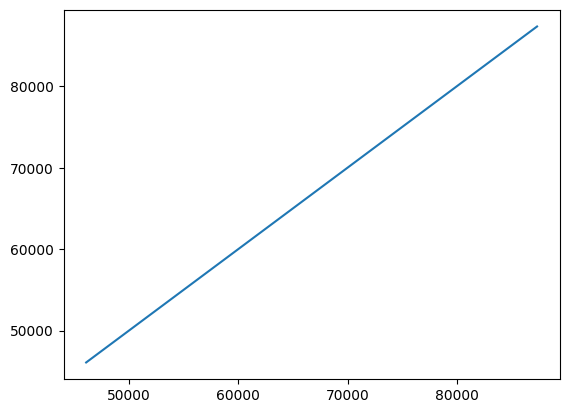

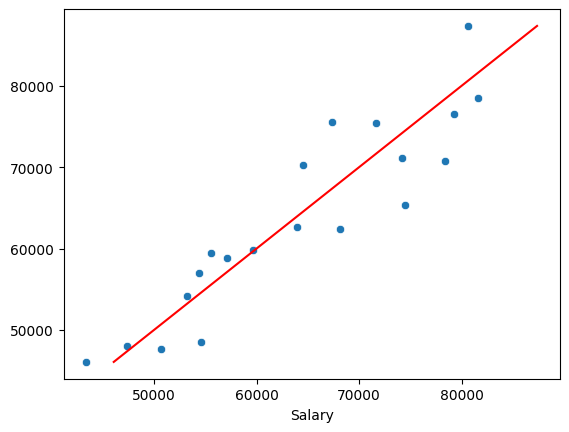

In [13]:
# 🌟 Part 1: Regression → Predicting Salary

# Goal: Predict employee Salary based on their Age, Years_At_Company, Department.

# Steps:

# Select features (X) and target (y = Salary).

# Split into training + test data.

# Train a regression model (Linear Regression).

# Evaluate with R² and MSE.

# Visualize predictions vs actual salaries.


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# loading the csv dataset 
df = pd.read_csv("realistic_employee_data.csv")

# Features
y = df["Salary"]
X = df[["Age","Years_At_Company"]]

# Test train split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f"x training data {X_train}\n x test is {X_test}\n y train data {y_train} \n y test {y_test}")

# Model
reg = LinearRegression()
reg.fit(X_train,y_train)

# Prediction
y_pred = reg.predict(X_test)
print("the predicted value is")
print(y_pred)



print("Coefficients:" ,reg.coef_)
print("Intercept:",reg.intercept_)
print("R2 score is",r2_score(y_test,y_pred))
print("MSE" ,mean_squared_error(y_test,y_pred))
print("RMSE",root_mean_squared_error(y_test,y_pred))


sns.lineplot(x=y_pred,y=y_pred)
plt.show()

sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_pred,y=y_pred,color='red')
# plt.plot([y_test.min(), y_test.max()],
#          [y_test.min(), y_test.max()],
#          'r--') 
plt.show()







In [14]:
# 🌟 Part 2: Classification → Predicting High vs Low Earner

# Goal: Predict whether an employee is High Earner or Low Earner.

# We’ll define:

# High Earner = Salary > 60,000

# Low Earner = Salary ≤ 60,000

# Steps:

# Create a new column High_Earner (Yes/No).

# Select features (Age, Years_At_Company, Department).

# Split into training + test data.

# Train a classification model (Logistic Regression first).

# Evaluate with Accuracy and Confusion Matrix.

# Visualize decision boundary (if possible).

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report



df["High_Earner"] = (df['Salary'] > 60000).astype(int)

X = df[["Age","Years_At_Company"]]
y = df["High_Earner"]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"the y test is {y_test}")

clsf = LogisticRegression()
clsf.fit(X_train,y_train)


y_pred = clsf.predict(X_test)

print(f"the predicted is {y_pred}")
print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"confusion matrix {confusion_matrix(y_test,y_pred)}")
print(f"precision rate {precision_score(y_pred,y_test)}")
print(f"Recall rate {recall_score(y_pred,y_test)}")
print(f"Error rate {(1-accuracy_score(y_test,y_pred) )}")
print(f"f1 score {f1_score(y_pred,y_test)}")
print(f"classification report \n {classification_report(y_pred,y_test)}")








the y test is 83    1
53    1
70    0
45    0
44    0
39    1
22    1
80    1
10    1
0     1
18    1
30    1
73    0
33    0
90    0
4     1
76    0
77    0
12    1
31    0
Name: High_Earner, dtype: int32
the predicted is [1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1]
accuracy 0.85
confusion matrix [[ 6  3]
 [ 0 11]]
precision rate 1.0
Recall rate 0.7857142857142857
Error rate 0.15000000000000002
f1 score 0.88
classification report 
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.79      0.88        14

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



In [ ]:
df["High_Performer"] = (df["Performance_Score"] >= 85).astype(int)

df_encoded = pd.get_dummies(df,columns=["Department"],drop_first=True) # one - hot encoding because department is a non numeric column so it converts each department into diffent columns

X= df_encoded.drop(columns=["Performance_Score", "High_Performer","Employee_ID","High_Earner","Bonus"  ])   
y = df_encoded["High_Performer"]

print(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

mdl =  LogisticRegression()
mdl.fit(X_train,y_train)

y_pred = mdl.predict(X_test)

print(f"the classification report is \n {classification_report(y_test,y_pred)}")

    Age  Years_At_Company  Salary  Department_HR  Department_IT  \
0    50                14   79243          False          False   
1    36                 9   59046           True          False   
2    29                 7   49486          False          False   
3    42                12   68338          False          False   
4    40                 9   63911           True          False   
..  ...               ...     ...            ...            ...   
95   58                20   90757          False          False   
96   56                20   94434           True          False   
97   43                12   61060          False          False   
98   48                16   88711          False          False   
99   56                20   83420          False          False   

    Department_Marketing  Department_Sales  
0                  False              True  
1                  False             False  
2                  False             False  
3              

c:\Users\user105\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a binary target: high performer if Performance_Score >= 85
df["High_Performer"] = (df["Performance_Score"] >= 85).astype(int)

# One-hot encode Department
df_encoded = pd.get_dummies(df, columns=["Department"], drop_first=True)  

# Features: age, years, and department
X = df_encoded[["Age", "Years_At_Company", "Department_HR", "Department_IT"]]  
y = df_encoded["High_Performer"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Confusion Matrix:
 [[9 1]
 [3 7]]
Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [32]:
from sklearn.model_selection import cross_val_score
mdkl = LogisticRegression(max_iter=1000)

scores = cross_val_score(mdkl,X,y,cv=6,scoring="accuracy")
print(scores)

print("Scores for each fold:", scores)
print("Mean Accuracy:", scores.mean())
print("Std Deviation:", scores.std())

[0.82352941 0.70588235 0.82352941 0.82352941 0.8125     0.875     ]
Scores for each fold: [0.82352941 0.70588235 0.82352941 0.82352941 0.8125     0.875     ]
Mean Accuracy: 0.8106617647058822
Std Deviation: 0.0510199989906032


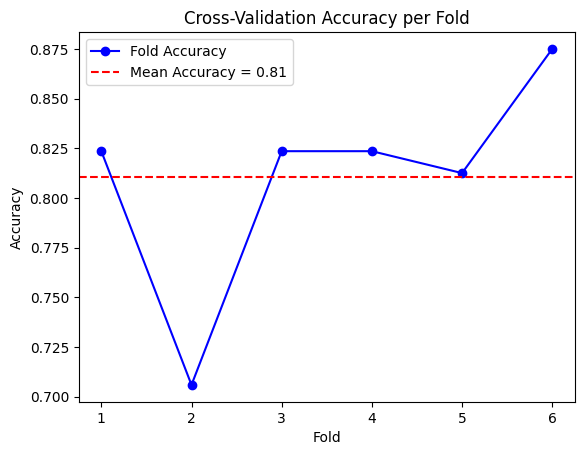

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1, 7), scores, marker='o', linestyle='-', color='blue', label="Fold Accuracy")
plt.axhline(y=scores.mean(), color='red', linestyle='--', label=f"Mean Accuracy = {scores.mean():.2f}")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy per Fold")
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import log_loss

y_true = [1, 0, 1, 1]
y_pred_prob = [0.9, 0.2, 0.8, 0.6]  # predicted probabilities

print("Log Loss:", log_loss(y_true, y_pred_prob))


Log Loss: 0.2656183105130591


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


df = pd.read_csv('realistic_employee_data.csv')
df["High_Performer"] = (df["Performance_Score"] >= 85).astype(int)

X = df[["Age","Years_At_Company","Salary"]]
y = df["High_Performer"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# -----------------Training logistic regression-------------------

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

y_predic = log_model.predict(X_test)

print("accuracy_score",accuracy_score(y_test,y_predic))
print("confusion_matrix",confusion_matrix(y_test,y_predic))
print("classification_report",classification_report(y_test,y_predic))


accuracy_score 0.8
confusion_matrix [[9 1]
 [3 7]]
classification_report               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.88      0.70      0.78        10

    accuracy                           0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



    Employee_ID  Age  Years_At_Company  ...  Department  Bonus High_Performer
0             1   50                14  ...       Sales   7448              1
1             2   36                 9  ...          HR   4782              0
2             3   29                 7  ...     Finance   4156              0
3             4   42                12  ...     Finance   5193              0
4             5   40                 9  ...          HR   4345              0
..          ...  ...               ...  ...         ...    ...            ...
95           96   58                20  ...       Sales   8531              1
96           97   56                20  ...          HR   9443              1
97           98   43                12  ...   Marketing   5861              1
98           99   48                16  ...     Finance   7983              1
99          100   56                20  ...       Sales   8342              1

[100 rows x 8 columns]


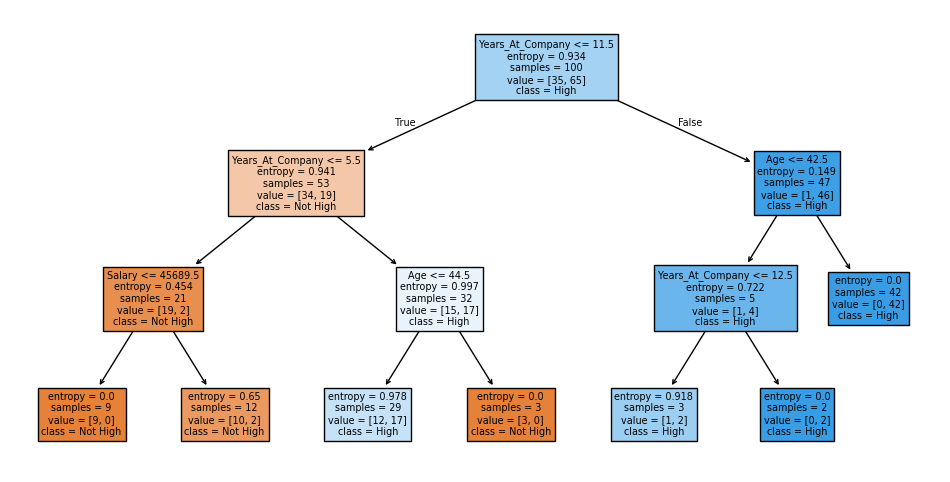

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df[['Age', 'Years_At_Company', 'Salary']]  
y = (df['Performance_Score'] >= 80).astype(int)  # 1 = High Performer, 0 = Not

print(df)

tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
tree.fit(X, y)


plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()

0     Senior (11+)
1       Mid (6–10)
2       Mid (6–10)
3     Senior (11+)
4       Mid (6–10)
          ...     
95    Senior (11+)
96    Senior (11+)
97    Senior (11+)
98    Senior (11+)
99    Senior (11+)
Name: Years_Binned, Length: 100, dtype: category
Categories (3, object): ['New (0–5)' < 'Mid (6–10)' < 'Senior (11+)']
0     2
1     0
2     0
3     2
4     0
     ..
95    2
96    2
97    2
98    2
99    2
Name: Years_Binned_Enc, Length: 100, dtype: int32


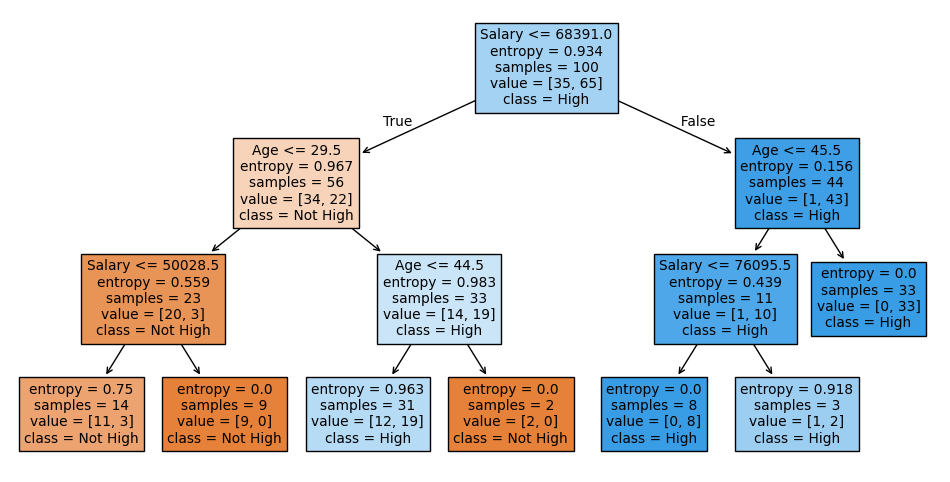

In [6]:
# Custom bins for years at company
df['Years_Binned'] = pd.cut(
    df['Years_At_Company'],
    bins=[0, 5, 10, 50],    # 0–5, 6–10, 11+
    labels=['New (0–5)', 'Mid (6–10)', 'Senior (11+)']
)

print(df["Years_Binned"])


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Years_Binned_Enc'] = le.fit_transform(df['Years_Binned'])

print(df['Years_Binned_Enc'])




X = df[['Age', 'Salary', 'Years_Binned_Enc']]
y = (df['Performance_Score'] >= 80).astype(int)

tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=['Not High', 'High'], filled=True)
plt.show()